<a href="https://colab.research.google.com/github/gourab-sinha/Machine_Learning/blob/master/Naive%20Bayes%20Classifier/Project/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load Packages
from string import punctuation
import operator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Fetch words from 20 different categories
#### Categories are labelled with integer values


In [0]:
class TextClassification:
    
    # Pick top frequently occurred words
    # Initial it is -1 as we don't know at first
    pick_top_words = -1

    # Categories with integer labels
    categories = {1:"alt_atheism",2:"comp_graphics",3:"comp_os_ms_windows_misc",4:"comp_sys_ibm_pc_hardware",
              5:"comp_sys_mac_hardware",6:"comp_windows_x",7:"misc_forsale",8:"rec_autos",
              9:"rec_motorcycles",10:"rec_sport_baseball",11:"rec_sport_hockey",12:"sci_crypt",
              13:"sci_electronics",14:"sci_med",15:"sci_space",16:"soc_religion_christian",
              17:"talk_politics_guns",18:"talk_politics_mideast",19:"talk_politics_misc",
              20:"talk_religion_misc"}

    # Stop words
    stop_words=set(["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
                   "by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
                   "here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
                   "more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
                   "she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
                   "these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd","we'll","we're",
                   "we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
                   "would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"])
    
    # Function to get dictionary in the form of list(key-value pair for each element in list)
    def get_word_dictionary(self):

        # Store words with occurrence 
        dictionary = {}

        # Base Path 
        base_path = "/Users/gourabsinha/Desktop/Machine Learning/Naive Bayes Classifier/"

        # Iterate for each category
        for i in range(1,21):
            # File location
            path = base_path+str(self.categories[i])+".txt"
            with open(path, encoding="utf8", errors='ignore') as file_obj:
                file_data =  file_obj.readlines()

            # Iterate over each line and pick words except stop words
            for i in range(len(file_data)):
                for word in file_data[i].split():
                    if word.lower() not in self.stop_words:
                        dictionary[word.lower()] = dictionary.get(word.lower(),0)+1

        # Special and digits
        ignore_words_with_specialcharacters_digits = set(punctuation)
        for i in range(0,10):
            ignore_words_with_specialcharacters_digits.add(str(i))

        # Remove all keys with special characters and digits
        for key in dictionary.copy():
            for char in ignore_words_with_specialcharacters_digits:
                if char in key:
                    dictionary.pop(key)
                    break

        # Sort based on occurrence
        sorted_dictionary = dict(sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True))
        words = [key for key,val in sorted_dictionary.items()]
        value = [val for key,val in sorted_dictionary.items()]

        # Pick top 2000 most appeared words with their count
        top_words = []
        i = 0
        for key,val in sorted_dictionary.items():
            top_words.append([key,val])
            i+=1
            # Initially below condition won't hit as pick_top_words is -1
            # After figuring out which are the top words we set the parameter and then it will hit. 
            if i==self.pick_top_words:
                break
        
        # Returns top words
        return top_words
    
    def get_words_one_datapoint(self,file_data):
        dictionary = {}
        
        # Iterate over each line and pick words except stop words
        for i in range(len(file_data)):
            for word in file_data[i].split():
                if word.lower() not in self.stop_words:
                    dictionary[word.lower()] = dictionary.get(word.lower(),0)+1
        
        # Special and digits
        ignore_words_with_specialcharacters_digits = set(punctuation)
        for i in range(0,10):
            ignore_words_with_specialcharacters_digits.add(str(i))

        # Remove all keys with special characters and digits
        for key in dictionary.copy():
            for char in ignore_words_with_specialcharacters_digits:
                if char in key:
                    dictionary.pop(key)
                    break

        # Sort based on occurrence
        sorted_dictionary = dict(sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True))
        
        return sorted_dictionary
        
        
        
        

    def build_dataset(self,top_words):
        
        # Base Path
        base_path = "/Users/gourabsinha/Desktop/Machine Learning/Naive Bayes Classifier/20_newsgroups/"
        
        # To store all data_point. 
        dataset = []
        
        # Store information like words - count and total word count for a class
        words = {}
        for i in top_words:
            words[i[0]] = 0
        
        # Iterate for each category
        for i in range(1,21):
            path = base_path + str(self.categories[i])+"/"
            for j in range(1,701):
                
                # Indivisual file path
                file_path = path+str(j)+".txt"
                
                # Initialize data_point with 0 for each words and it is for every file
                data_point = words.copy()
                
                # File open file
                with open(file_path, encoding="utf8", errors='ignore') as file_obj:
                    file_data =  file_obj.readlines()
                
                # Get the words present the text file
                data_point_dictionary = self.get_words_one_datapoint(file_data)
                
                # Check word top words present in the returned dictionary above
                for word in data_point.keys():
                    if word in data_point_dictionary.keys():
                        data_point[word] = data_point_dictionary[word]
                
                # Add Target column for class label
                data_point['Target'] = self.categories[i]
                
                # Append to the data_point to dataset
                dataset.append(data_point)
        
        
        # Feature names
        columns = [i[0] for i in top_words]
        
        # Target Label
        columns.append('Target')
        
        # Create DataFrame
        df = pd.DataFrame(dataset,columns=columns)
        return df
                
    
    def train_model(self,dataset):
        # Different classes in Target
        classes = dict(dataset['Target'].value_counts().items())
        
        # To store all information
        result = {}
        
        # Overall count of words present in the dataset.
        total_word_count = 0
        
        # Iteratre over each class
        for class_type in classes.keys():
            
            # Filter out based on the class
            features = dataset[dataset['Target']==class_type]
            
            # Features except Target
            feature_names = list(features.columns) 
            feature_names.remove('Target')
            
            # Store the feature and its count present in class_type
            feature_with_count = {}
            
            # Total Count words in class_type
            total_count = 0
            
            # Iterate over each features
            for feature_name in feature_names:
                
                # Count of words present for ith feature which is present in class_type
                count = features[feature_name].sum()
                
                # Store ith feature as key and count as value
                feature_with_count[feature_name] = count
                
                # Store information about overall word counts present int class_type
                total_count+=count
            
            # Store total count of words present in class_type in Total label for class_type
            feature_with_count['Total'] = total_count
            
            # Increment the overall count
            total_word_count += total_count
            
            # Pair the feature_with_count dictionary to class_type
            result[class_type] = feature_with_count
        
        # Store the overall word count in Overall key
        result['Overall'] = total_word_count
        
        return result
    
    
    
    def __probability(self,dictionary,words,current_class):
        
        # Log probability of current_class_word_count/overall_count 
        output = np.log(dictionary[current_class]['Total'])-np.log(dictionary['Overall'])
        
        # Iterate over each features
        for feature in words.keys():
            
            # If word count in target file is zero then ignore
            if words[feature]==0:
                continue
            
            # Get the count of word in current class for ith feature
            count = dictionary[current_class][feature]+1
            
            # Total count of words present in current_class
            total_count = dictionary[current_class]['Total']+len(words)
            
            # Calculate log probability
            cal = np.log(count) - np.log(total_count)
            
            # Adding to output as it is log probability
            output=output+cal
        
        return output
    
    
    
    def __predictPoint(self,dictionary,words):
        
        # Get the all different target classes present in Dictionary
        classes = dictionary.keys()
        
        # Initialized as lowest min value, None class, and first_run for first class
        best_Prob = -10000000
        best_class = -1
        first_run = True
        
        # Iterate over each classes except the Overall as it's the target class
        for current_class in classes:
            if current_class=='Overall':
                continue
            
            # Get the probabiltiy for the current class
            p_current_class = self.__probability(dictionary,words,current_class)
            
            # Pick the probability which is is higher than all and the class_name
            if(first_run or p_current_class>best_Prob):
                best_Prob = p_current_class
                best_class = current_class
            
            first_run = False
        
        return best_class
    
    
    
    def predict(self,dictionary,top_words,file_path):
        
        # Open the file object and get the data as lines
        with open(file_path, encoding="utf8", errors='ignore') as file_obj:
            file_data =  file_obj.readlines()
        
        # Initialize all the word i.e feature count as zero
        words = {}
        for i in top_words:
            words[i[0]] = 0
        
        # Get the dictionary for the target file
        data_point_dictionary = self.get_words_one_datapoint(file_data)
        
        # Check the feature i.e word present in the target file dictionary
        for word in words.keys():
            
            # If exist then store the count otherwise ignore
            if word in data_point_dictionary.keys():
                words[word] = data_point_dictionary[word]
        
        
        # Get the best class name and return
        class_name = self.__predictPoint(dictionary,words)
        return class_name

In [0]:
# Get the words and their occurrences in 20000 files. 
# NOTE: I have merged 1000 files to one for each category
clf = TextClassification()
top_words = clf.get_word_dictionary()

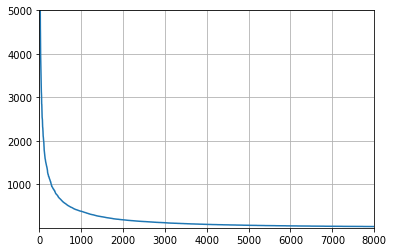

In [0]:
# Decide based on the graph which words needs to be picked
features=top_words
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [0]:
# 2000 will best so setting the pick_top_words to 2000
clf.pick_top_words = 2000

# Pick only top 2000 words
top_words = top_words[:2000]
top_words

[['not', 29566],
 ['apr', 19602],
 ['gmt', 17684],
 ['can', 16284],
 ['will', 14690],
 ['one', 12976],
 ['article', 12108],
 ['no', 10507],
 ['like', 9434],
 ['just', 9425],
 ['people', 8415],
 ['get', 8331],
 ['university', 8203],
 ['know', 7695],
 ['think', 7205],
 ['may', 7126],
 ['use', 6251],
 ['also', 6166],
 ['x', 6152],
 ['new', 6086],
 ['even', 5400],
 ['good', 5278],
 ['make', 4916],
 ['many', 4872],
 ['see', 4691],
 ['two', 4557],
 ['much', 4530],
 ['time', 4336],
 ['first', 4114],
 ['want', 4104],
 ['say', 4051],
 ['anyone', 3976],
 ['need', 3918],
 ['way', 3791],
 ['us', 3745],
 ['used', 3742],
 ['go', 3617],
 ['world', 3602],
 ['really', 3507],
 ['now', 3450],
 ['since', 3418],
 ['right', 3326],
 ['believe', 3309],
 ['still', 3290],
 ['going', 3216],
 ['something', 3190],
 ['computer', 3157],
 ['find', 3145],
 ['system', 3137],
 ['take', 3115],
 ['might', 3107],
 ['said', 3060],
 ['please', 3055],
 ['using', 3033],
 ['god', 2881],
 ['never', 2881],
 ['last', 2849],
 ['mus

In [0]:
# Build the dataset in the form of x1,x2,x3,...,xN, Target.
dataset = clf.build_dataset(top_words)
dataset

,not,apr,gmt,can,will,one,article,no,like,just,...,amiga,button,montreal,prepared,talks,interpretation,hundreds,engineer,path,Target
0,1,1,2,2,1,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,alt_atheism
1,61,1,2,13,7,17,3,22,6,16,...,0,0,0,1,4,2,0,0,0,alt_atheism
2,13,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,0,0,0,0,alt_atheism
3,1,1,1,4,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,alt_atheism
4,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,alt_atheism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,talk_religion_misc
13996,0,1,1,0,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,talk_religion_misc
13997,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,talk_religion_misc
13998,8,1,1,3,1,1,5,0,0,7,...,0,0,0,0,0,0,1,0,0,talk_religion_misc


In [0]:
dictionary = clf.train_model(dataset)
dictionary

{'rec_sport_baseball': {'not': 673,
  'apr': 725,
  'gmt': 646,
  'can': 336,
  'will': 386,
  'one': 306,
  'article': 434,
  'no': 235,
  'like': 303,
  'just': 296,
  'people': 127,
  'get': 261,
  'university': 295,
  'know': 219,
  'think': 302,
  'may': 129,
  'use': 47,
  'also': 125,
  'x': 12,
  'new': 152,
  'even': 176,
  'good': 289,
  'make': 142,
  'many': 166,
  'see': 164,
  'two': 196,
  'much': 163,
  'time': 178,
  'first': 211,
  'want': 84,
  'say': 123,
  'anyone': 119,
  'need': 55,
  'way': 124,
  'us': 42,
  'used': 55,
  'go': 179,
  'world': 89,
  'really': 151,
  'now': 108,
  'since': 104,
  'right': 79,
  'believe': 97,
  'still': 140,
  'going': 126,
  'something': 78,
  'computer': 42,
  'find': 60,
  'system': 20,
  'take': 102,
  'might': 127,
  'said': 82,
  'please': 49,
  'using': 16,
  'god': 14,
  'never': 93,
  'last': 317,
  'must': 37,
  'back': 122,
  'news': 124,
  'state': 50,
  'without': 62,
  'work': 36,
  'well': 105,
  'got': 122,
  'so

In [0]:
# Path for the target file
path = "/Users/gourabsinha/Desktop/Machine Learning/Naive Bayes Classifier/Random.txt"
class_name = clf.predict(dictionary,top_words,path)
print(class_name)

rec_sport_baseball
